<a href="https://colab.research.google.com/github/Viratvenom/AIRBNB-EDA-PROJECT/blob/main/Airbnb_Bookings_Analysis_Capstone_Project_MAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as :
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

**EDA PROJECT AIRBUB OBSERVATIONS**

In [ ]:
#refer Geopandas 0.12.1 at htpps://geopandas.org/index.html and part 1 - introduction to geographic data science .ipynb at https://colab.research.google.com
!apt install gdal-bin python-gdal python3-gdal #install geopython libraries
!apt install python4-rtree #install python3-rtree - Geopandas requirment
!apt install git+git://github.com/geopandas/geopandas.git #install geopandas
!pip install descartes #install descartes - Geopandas requirement
!pip install geopandas
!pip install plotly
!pip install adr-tools-python
!pip install Nominatim(user_agent="geoapiExercises")


Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 1s (4,263 kB/s)
Selecting previously unselected

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `pip install Nominatim(user_agent="geoapiExercises")'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import seaborn as sns
import sklearn.metrics as metrics
sns.set()
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
working_path = '/content/drive/MyDrive/Airbnb NYC 2019.csv'


In [ ]:
Airbnb_df = pd.read_csv(working_path)

In [ ]:
Airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
Airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
Airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
Airbnb_df.shape

(48895, 16)

In [ ]:
Airbnb_df.neighbourhood_group.unique()


array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
len(Airbnb_df.neighbourhood.unique())

221

In [ ]:
Airbnb_df['price'].sum()

7467278

In [ ]:
Airbnb_df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

## **Neighbourhood_group**

In [ ]:
Airbnb_df.groupby('neighbourhood_group').std()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,
Bronx,1.023402e+07,8.707959e+07,0.026717,0.032818,106.709349,15.631792,42.214774,1.673284,2.370576,135.247098
Brooklyn,1.083320e+07,7.260060e+07,0.027397,0.025482,186.873538,17.632726,44.344868,1.516259,5.273758,126.275775
Manhattan,1.116793e+07,7.936435e+07,0.038463,0.022138,291.383183,24.050857,42.572277,1.628252,48.234766,132.677836
Queens,1.037687e+07,8.424324e+07,0.040368,0.056988,167.102155,15.028725,51.955853,2.213108,12.445003,135.538597
Staten Island,1.039310e+07,7.954340e+07,0.032419,0.036400,277.620403,19.727605,44.830766,1.685495,1.915580,131.852000


In total, there are 16 columns and 48895 rows which comprises ample information on which we can perform our in-depth analysis.
We can also see from the above, there are some missing NaN values that will require cleaning and handling.
We have a list of 5 categorical unique 'Neighbourhood_group' which are 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'.
There are 221 categorical unique 'Neighbourhood' data , and sum of tottle sum of money i.e 7467278
We have prominently 3 different room types i.e 'Private room', 'Shared room' and Entire home/apt.

From the above information, last_review is in the form of a date and if there is no value present, there were no reviews for the listing so the date does not exist. For 'reviews_per_month', we can append the missing values with 0.0 (float64). Hence, if the 'number_of_review' is 0, it can be inferred that the review rate is also 0

## **Cleaning the data predictive analysis**
     


Remove NaN values from the data

Replace all the missing values with 0

Dropping columns that are not required and are insignificant for our analysis

In [ ]:
Airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

For 'reviews_per_month', we can append the missing values with 0.0 (float64). Hence, if the 'number_of_review' is 0, it can be inferred that the review rate is also 0

In [ ]:
Airbnb_df.dropna(how='any',inplace=True)

In [ ]:
Airbnb_df.fillna({'reviews_per_month':0.0}, inplace=True)
Airbnb_df.reviews_per_month.isnull().sum()

0

In [ ]:
Airbnb_df.drop(['id','host_name','last_review'], inplace = True, axis =1)

In [ ]:
Airbnb_df = Airbnb_df.dropna(subset=['reviews_per_month'])

In [ ]:
Airbnb_df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129


For 'reviews_per_month', we can append the missing values with 0.0 (float64). Hence, if the 'number_of_review' is 0, it can be inferred that the review rate is also 0

## **Exploratory data analysis- Data exploration**

# **DATA  Informations**

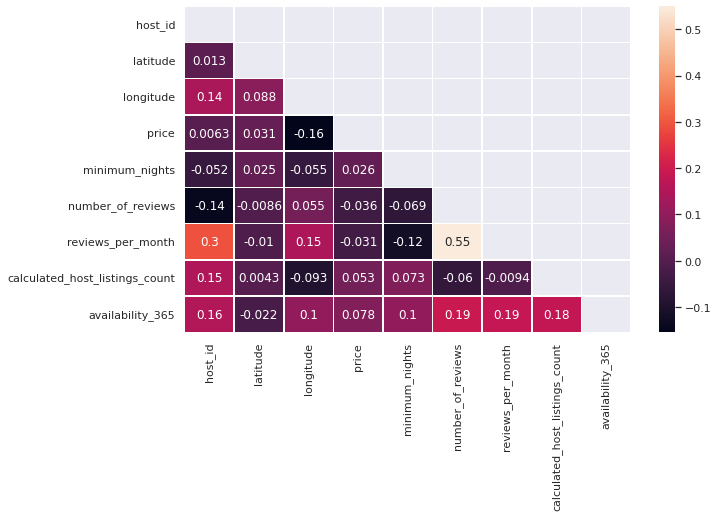

In [ ]:
#plot heat map
sns.set(rc={'figure.figsize':(10,6)})
sns.set(style="dark")

corr = Airbnb_df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data = corr, mask = mask, linewidth = 0.5, annot = True)

In Heat map chart indicates that where value are encoded in colors or either in the from of postive value and negative value, delivering a convenient, insightful view of informations.
It is visible that we can observe a negative correlation between 'price' and 'number_of_reviews', which leads to the conclusion that properties with lower prices are more likely to be booked and have more reviews.
And 'number_of_reviews' and 'reviews_per_month' are positvely correlated as one can expected higher rate of reviews per month.

##  **POPULARITY OF AIRBNB BY LOCATIONS IN NYC**

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
mapping = gpd.GeoDataFrame(Airbnb_df, geometry = gpd.points_from_xy
                          (Airbnb_df.longitude,Airbnb_df.latitude))

In [ ]:
Airbnb_df.columns

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'geometry'],
      dtype='object')

In [ ]:
Airbnb_df.tail(5)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,geometry
48782,Lovely Privet Bedroom with Privet Restroom,83554966,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,1.0,1,147,POINT (-73.95366 40.78099)
48790,No.2 with queen size bed,257683179,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,1.0,6,339,POINT (-73.81459 40.75104)
48799,Seas The Moment,211644523,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,1.0,1,87,POINT (-74.14275 40.54179)
48805,1B-1B apartment near by Metro,273841667,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2.0,1,40,POINT (-73.92400 40.80787)
48852,"Cozy Private Room in Bushwick, Brooklyn",74162901,Brooklyn,Bushwick,40.69805,-73.92801,Private room,30,1,1,1.0,1,1,POINT (-73.92801 40.69805)


**when you check the actual Longtitude and Lactitude themselves, they are highly similar to each other with slight difference. Pictures of rooms, facilities on Airbnb's listings cannot be distinguished from one to another. From a respective point of view, it seems like he is running a boutique hotel but classify as shortterm rental's license, which was designed specially for Airbnb, from the city center.**

## **Mapping**

In [ ]:
Airbnb_df[['latitude','longitude','geometry']]

,latitude,longitude,geometry
0,40.64749,-73.97237,POINT (-73.97237 40.64749)
1,40.75362,-73.98377,POINT (-73.98377 40.75362)
3,40.68514,-73.95976,POINT (-73.95976 40.68514)
4,40.79851,-73.94399,POINT (-73.94399 40.79851)
5,40.74767,-73.97500,POINT (-73.97500 40.74767)
...,...,...,...
48782,40.78099,-73.95366,POINT (-73.95366 40.78099)
48790,40.75104,-73.81459,POINT (-73.81459 40.75104)
48799,40.54179,-74.14275,POINT (-74.14275 40.54179)
48805,40.80787,-73.92400,POINT (-73.92400 40.80787)


In [ ]:
lats2022 = Airbnb_df['latitude'].tolist()
                        #tolist(): convert the series to a list
lons2022 = Airbnb_df['longitude'].tolist()
locations = list(zip(lats2022, lons2022))

map1 = folium.Map(location=[40.75362 ,-73.98377], zoom_start=12.5)
                                #location=[47.6062, -122.3321] : is the latitude and longtitude of Seattle
FastMarkerCluster(data=locations).add_to(map1)
map1

## **Room types, Property type, & Number of people per booking**

**However, the guideline is not enforced upon all the listings, there are limited exceptions to the maximum number of units, including some exceptions for short-term rentals legally operated before Since 2008. It is noted that the if you operate a hotel or motel on Airbnb, the host will not required to register for a shorterm rental permit, but do need to claim a formal exemption.**

In [ ]:
Airbnb_df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
Booking_nyc = Airbnb_df.groupby(['neighbourhood_group','room_type',])['room_type'].count().unstack()
Booking_nyc

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,308,524,43
Brooklyn,8159,7990,290
Manhattan,9962,6303,356
Queens,1742,2678,152
Staten Island,150,159,5


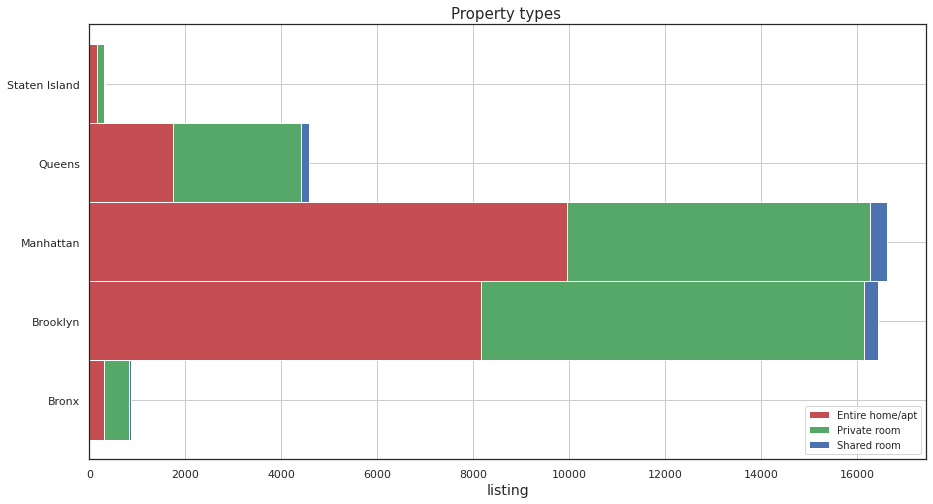

In [ ]:
Booking_nyc.plot(kind='barh',stacked=True, color=['r','g','b','y'],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
                                        #Trying to match with the color pallete that we have above
plt.title('Property types ', fontsize=15)
plt.xlabel('listing', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 10})
plt.rc('ytick', labelsize=13)
plt.show()

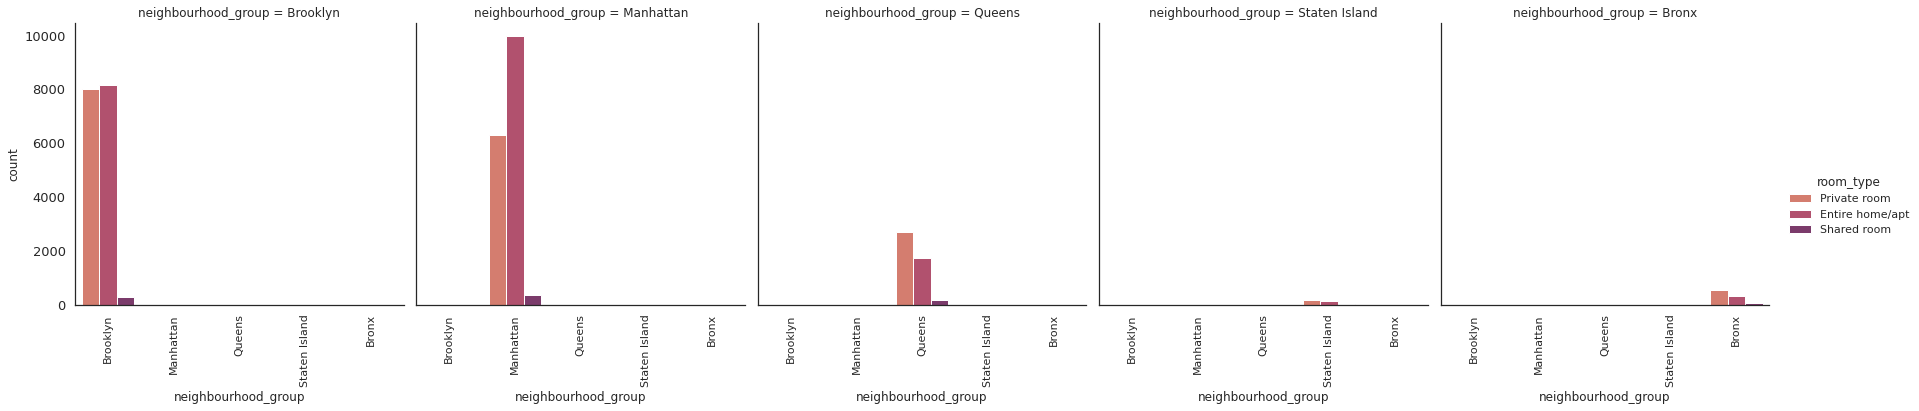

In [ ]:
r = sns.catplot(data = Airbnb_df, x='neighbourhood_group', hue='room_type', col='neighbourhood_group', palette='flare',kind="count")
r.set_xticklabels(rotation=90)
sns.set(rc={'figure.figsize':(10,6)})
sns.set(style="white")

## **Data visualization about different hosts and areas**



**host and areas can  visualization the data  "We are a passionate team running a modern tech-enabled corp housing co that believes nicely furnished high end homes should be consistent, affordable and easy to book and We anaylis and providing a unique, hassle-free, and high-quality housing experience in each of our  dataset has around 49,000  homes throughout the San Francisco Bay Area, Los Angeles, Washington"**

In [ ]:
hosts_areas = Airbnb_df.groupby(['host_id','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_areas.sort_values(by='calculated_host_listings_count', ascending=False).head()

,host_id,neighbourhood_group,calculated_host_listings_count
28274,219517861,Manhattan,327
23916,107434423,Manhattan,232
16150,30283594,Manhattan,121
25267,137358866,Manhattan,103
25266,137358866,Brooklyn,103


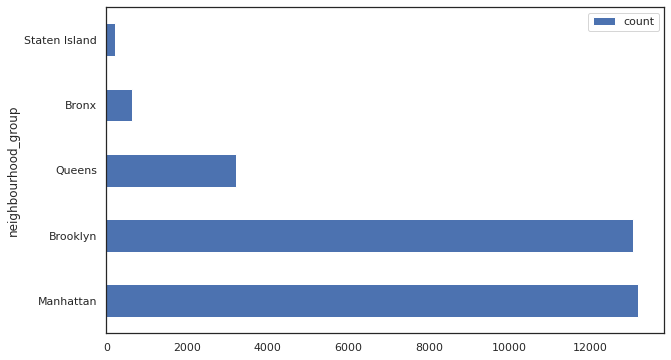

,host_id,neighbourhood_group,calculated_host_listings_count
0,2438,Brooklyn,1
1,2571,Brooklyn,1
2,2787,Brooklyn,6
3,2845,Manhattan,2
4,2868,Brooklyn,1
5,2881,Brooklyn,2
6,3151,Brooklyn,1
7,3211,Queens,1
8,3415,Queens,1
9,3563,Brooklyn,1


In [ ]:
locality_listed= hosts_areas.groupby('neighbourhood_group')[['neighbourhood_group','host_id']].agg(['count']
                                                                   )['host_id'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

locality_listed.head(15).plot(kind='barh')
plt.show()
pd.DataFrame(hosts_areas.head(15))

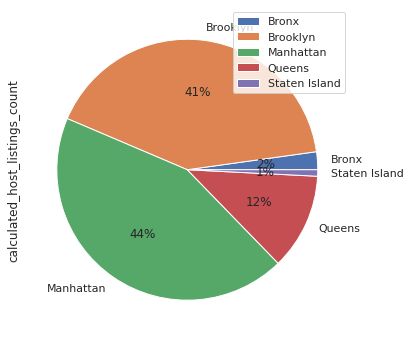

In [ ]:
hosts_areas.groupby(['neighbourhood_group']).sum().plot(
    kind='pie', y='calculated_host_listings_count', autopct='%1.0f%%')
#The pie chart shows that airbub listing in newyork are near manhattan and brooklyn has the highest share of hotels.

In [ ]:
top_host = hosts_areas.host_id.value_counts().head(10)
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_Id', 'host_id':'Count'}, inplace=True)
top_host_df

,Host_Id,Count
0,213781715,3
1,137358866,3
2,10457196,3
3,50770601,2
4,59808986,2
5,47625541,2
6,5637331,2
7,10109608,2
8,47351539,2
9,179657707,2


Text(0.5, 0, 'Host Ids')

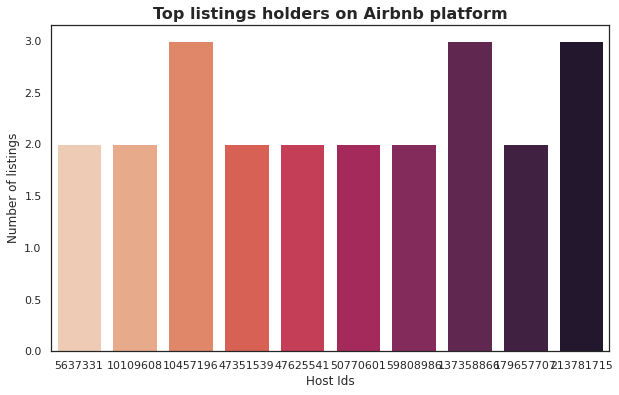

In [ ]:
mx = sns.barplot(x='Host_Id', y = 'Count', data = top_host_df, palette='rocket_r')

mx.set_title('Top listings holders on Airbnb platform', weight='bold', fontsize = 16)
mx.set_ylabel('Number of listings')
mx.set_xlabel('Host Ids')

# We can see our top 10 hosts have a good deal of listings on the Airbnb platform.
# The first host has more than 300 properties listed on the platform.

## **Neigbourhood's Average daily price**

In [ ]:
Airbnb_df.groupby('neighbourhood_group').std()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,
Bronx,8.412369e+07,0.026723,0.033036,63.999121,10.909080,44.892173,1.674106,2.029240,134.711978
Brooklyn,7.042375e+07,0.027020,0.025700,169.887979,15.310999,47.359937,1.516297,4.415408,126.471861
Manhattan,7.624496e+07,0.038989,0.022384,226.474061,20.807095,46.768000,1.627705,39.350035,128.016575
Queens,8.190279e+07,0.040608,0.057126,168.395210,10.782944,55.840832,2.213320,9.522756,134.091481
Staten Island,7.715904e+07,0.031423,0.034821,65.864044,5.555560,46.629123,1.685495,1.958514,125.746593


In [ ]:
df = Airbnb_df.groupby(['neighbourhood_group','number_of_reviews'])['price'].max().reset_index()
df.sort_values(by='price', ascending=False).head()

,neighbourhood_group,number_of_reviews,price
789,Queens,2,10000
151,Brooklyn,5,10000
469,Manhattan,6,9999
464,Manhattan,1,9999
465,Manhattan,2,8500


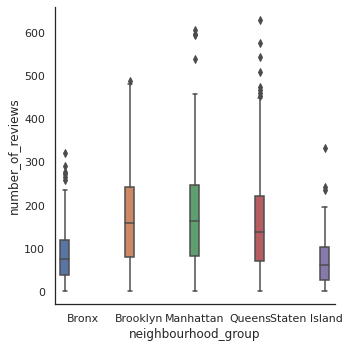

In [ ]:
sns.catplot(x="neighbourhood_group", y="number_of_reviews", hue="neighbourhood_group",kind="box", data= df)

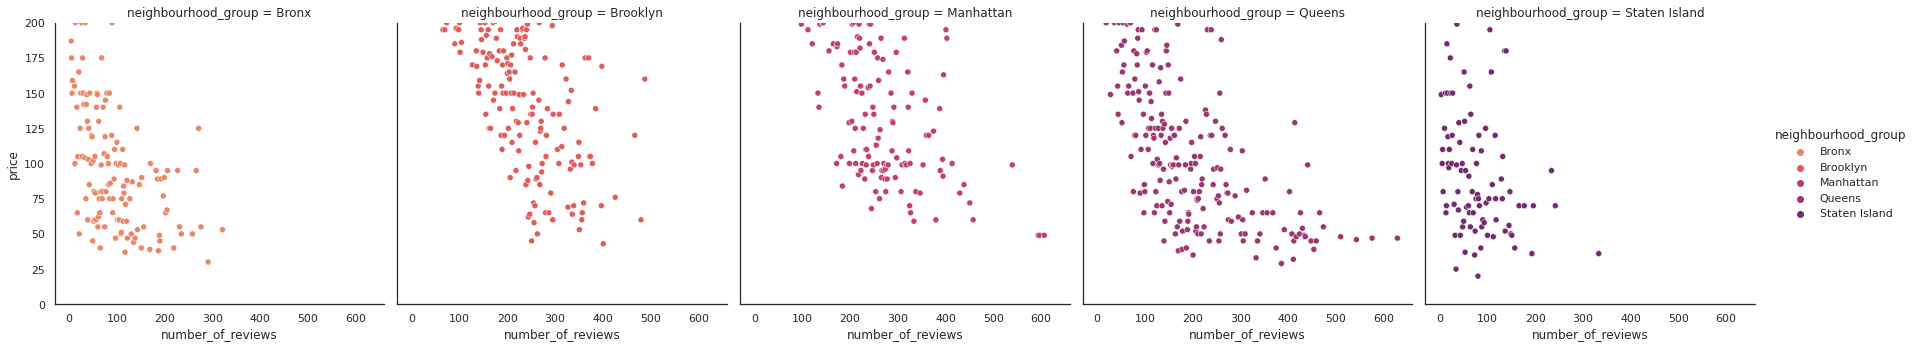

In [ ]:
sns.relplot(x=df.number_of_reviews, y=df.price, hue=df.neighbourhood_group, col=df.neighbourhood_group, palette="flare")
sns.set(rc={'figure.figsize':(10,5)})
plt.ylim(0,200)
sns.set(style="white")

Text(0.5, 0.98, 'Property Price in Seattle, according to property type')

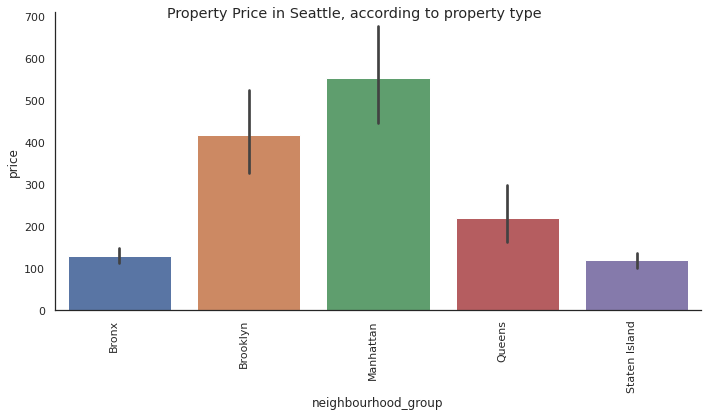

In [ ]:
cpsl=sns.catplot(x='neighbourhood_group', y='price', kind ='bar', data= df , aspect=2)
                                    #aspect: increase the width of your graph
cpsl.set_xticklabels(rotation=90, horizontalalignment='right')
                                    #rotation: the rotation of the vaues (House, Guesthouse,etc.)
cpsl.fig.suptitle("Property Price in Seattle, according to property type")


<function matplotlib.pyplot.show(*args, **kw)>

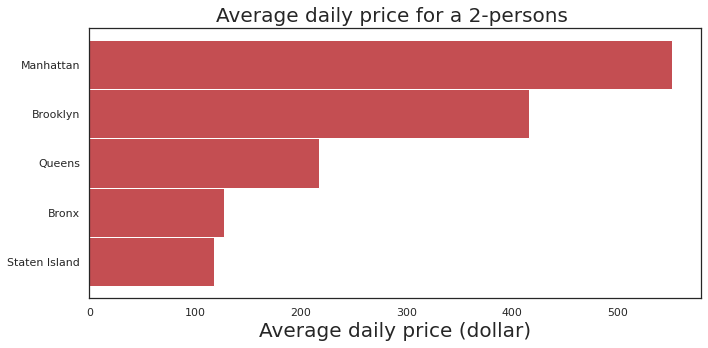

In [ ]:
feq1 = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=True)
ax1=feq1.plot.barh(color='r', width=1)
plt.title("Average daily price for a 2-persons ", fontsize=20)
plt.xlabel('Average daily price (dollar)', fontsize=20)
plt.ylabel("")





plt.tight_layout()
plt.show



In [ ]:
price = Airbnb_df.groupby(['reviews_per_month'])['price'].max().reset_index()
price.sort_values(by='reviews_per_month', ascending=False).head()


,reviews_per_month,price
936,58.50,100
935,27.95,199
934,20.94,45
933,19.75,80
932,17.82,50


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


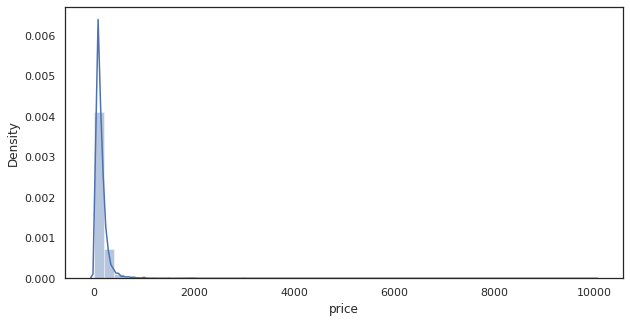

In [ ]:
#histrogram
sns.distplot(Airbnb_df['price']);

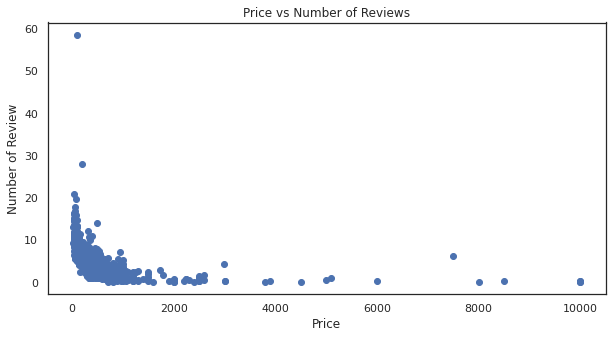

In [ ]:
area = price['price']
price = price['reviews_per_month']

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.scatter(area, price)

plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

**AREAS_REVIEWS**

In [ ]:
traffic= Airbnb_df.groupby(['neighbourhood_group','calculated_host_listings_count'])['minimum_nights'].count().reset_index()
traffic = traffic.sort_values(by='minimum_nights', ascending=False)
traffic.head(5)

,neighbourhood_group,calculated_host_listings_count,minimum_nights
37,Manhattan,1,11481
10,Brooklyn,1,10800
11,Brooklyn,2,2732
81,Queens,1,2422
38,Manhattan,2,1934


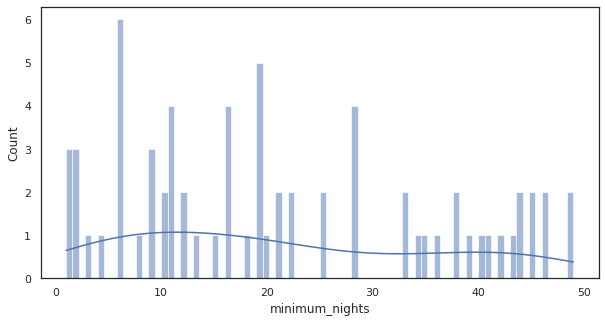

In [ ]:
min_night = traffic [traffic['minimum_nights'] <= 50]
sns.histplot(data=min_night, x="minimum_nights", kde=True, bins = 80)
sns.set(rc={'figure.figsize':(10,6)})
sns.set(style="white")

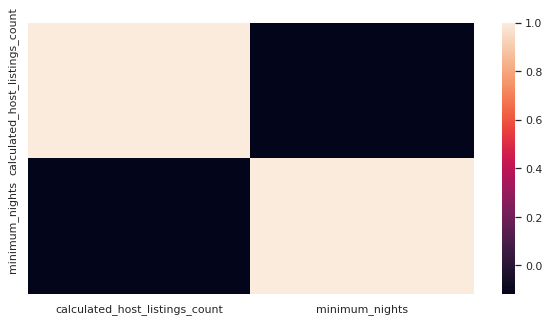

In [ ]:
plt.figure(figsize=(10,5))
cor = traffic.corr()
sns.heatmap(cor,)

In [ ]:
top = traffic.groupby(['neighbourhood_group']).agg({'calculated_host_listings_count':['count']})
top.columns = ['prop']
top = top.sort_values(by='prop', ascending=False).head(10)
top.reset_index()

,neighbourhood_group,prop
0,Manhattan,44
1,Brooklyn,27
2,Queens,19
3,Bronx,10
4,Staten Island,8


**From renting room solely with Airbnb, the founders decided to build up their own property renting app to rivals and partner with Airbnb at the same time. Their business approach is to give rediculous discount to potential renter/buyer at pricey area if they agree to become host for Airbnb. Hannah Exner (left) and Sam Joselyn scored a magnificent apartment at the Westlake for 1000USD/month at Westlake neighborhood where prices reach >1500USD/month:**

Conclusion:
1. The people who prefer to stay in Entire home or Apartment they are going to stay bit longer in that particular Neighbourhood only.
2. The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.
3. Most people prefer to pay less price.
4. If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.
5. If people are not staying more then one night means they are travellers